In [1]:
import matplotlib.pyplot as plt
import requests
import json
import base64
import numpy as np
import cv2
import io

def dec_img(resp)->np.array:
    k = resp.json()["content"]
    return np.load(io.BytesIO(base64.b64decode(k)))

server_url = "http://127.0.0.1:8081"
assets_folder = "assets"
imgname = "image.png"

## Sample requests to local server

### ```/to_values``` (convert image to DF values)

#### From file

In [ ]:
with open("{}/{}".format(assets_folder, imgname), "rb") as f:
    files = {"file": ("res.png", f)}
    resp = requests.post("{}/to_values".format(server_url), files=files)
    print(resp.status_code)
    print(resp.json())
print(dec_img(resp))
a = dec_img(resp)
np.save("{}/values.npy".format(assets_folder), a)

200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnPGY4JywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDEyOCwgMTI4KSwgfSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAoAAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwAAAAAAAPC/AAAAAAAA8L8AAAAAAADwvwA

### ```/get_df```

#### From local file

In [18]:
assets_folder = "../assets"
imgname = "floorplan0.png"

In [24]:


with open("{}/{}".format(assets_folder, imgname), "rb") as f:
    files = {"file": (imgname, f)}
    resp = requests.post("{}/get_df".format(server_url), files=files, data={
        "translation":json.dumps({"x": 160 * 50, "y": 90* 50}), 
        "rotation": json.dumps([0])
    })
    print(resp.status_code)
    print(resp.json())

200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnfHUxJywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDEyOCwgMTI4LCAzKSwgfSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#### From memory

In [ ]:
is_success, buffer = cv2.imencode(".png", img)
img_bytes = io.BytesIO(buffer.tobytes())


files = [
("file", (imgname, img_bytes))]
resp = requests.post("/get_df".format(server_url), files=files, data={
        "translation":json.dumps({"x": 0, "y": 0}), 
        "rotation": json.dumps([1.5, 2.0, 3.0])
    })
print(resp.status_code)
print(resp.json())

200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnfHUxJywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDEyOCwgMTI4LCAzKSwgfSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAoAAAAAAAAAAAAAAAD///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#### From several local files

In [ ]:

files = [
("file", ("floorplan0.png", open("{}/{}".format(assets_folder, imgname), "rb"))),
("file", ("floorplan1.png", open("{}/{}".format(assets_folder, "floorplan1.png"), "rb"))),
("file", ("floorplan2.png", open("{}/{}".format(assets_folder, "floorplan2.png"), "rb")))]
resp = requests.post("{}/get_df".format(server_url), files=files, data={
    "translation":json.dumps({"x": 160 * 50, "y": 90* 50}), 
    "rotation": json.dumps([0, -1.5707963267948966, -1.5707963267948966])
})
print(resp.status_code)
print(resp.json())



200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnfHUxJywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDEyOCwgMTI4LCAzKSwgfSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

255 (128, 128, 3)


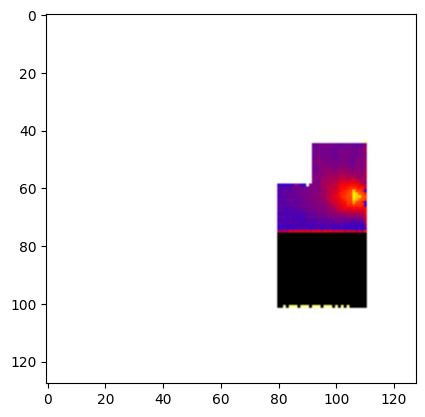

In [26]:
import numpy as np
import base64
import cv2
import io
k = resp.json()["content"]
# k = base64.b64decode(k)
img = np.load(io.BytesIO(base64.b64decode(k)))
print(np.max(img), img.shape)
plt.imshow(img[:,:,:])
# _ = cv2.imwrite("{}/{}".format(assets_folder, imgname), img)

### ```/get_stats``` 

#### From file

In [ ]:
import requests
files = [
("file", (imgname, open("{}/{}".format(assets_folder, imgname), "rb")))]
resp = requests.post("{}/get_stats".format(server_url), files=files)
print(resp.status_code)
print(resp.json())


200
{'metrics': {'average_value': -0.56732, 'ratio_gt1': 0.0}, 'success': True}


#### From memory

In [ ]:
is_success, buffer = cv2.imencode(".png", img)
img_bytes = io.BytesIO(buffer.tobytes())


files = [
("file", (imgname, img_bytes))]
resp = requests.post("{}/get_stats".format(server_url), files=files)

print(resp.status_code)
print(resp.json())


200
{'metrics': {'average_value': -0.56732, 'ratio_gt1': 0.0}, 'success': True}


### ```/to_rgb``` (convert DF values to RGB image)

200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnfHUxJywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDUsIDUsIDMpLCB9ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAr//wBrAJRrAJRrAJRrAJRrAJT//8hrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJRrAJQ=', 'success': True}
[[[255 255   0]
  [107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]]

 [[107   0 148]
  [255 255 200]
  [107   0 148]
  [107   0 148]
  [107   0 148]]

 [[107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]]

 [[107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]]

 [[107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]
  [107   0 148]]]


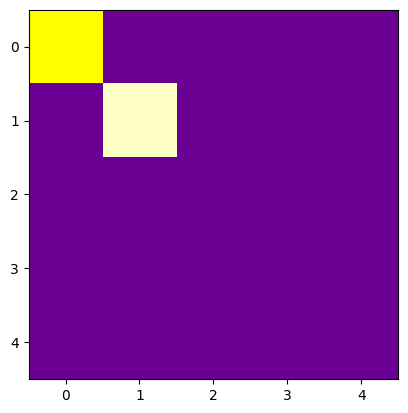

In [ ]:
arr = np.ones((5,5,3), np.float32)
arr[0][0] = 5.2
arr[1][1] = 9.1
is_success, buffer = cv2.imencode(".png", arr)
img_bytes = io.BytesIO(buffer.tobytes())
files = {"file": ("values.npy", img_bytes)}
resp = requests.post("{}/to_rgb".format(server_url), files=files)
print(resp.status_code)
print(resp.json())
result = dec_img(resp)
print(result)
plt.imshow(result)